## Исследование данных о российском кинопрокате



### ***Описание проекта***
    Заказчик этого исследования — Министерство культуры Российской Федерации. 
    Мы изучим рынок российского кинопроката и выявим текущие тренды, также 
    уделим внимание фильмам, которые получили государственную поддержку. 
    
    Мы будете работать с данными, опубликованными на портале открытых данных 
    Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, 
    сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

try:
    rental_certificates = pd.read_csv('YOUR_DATA')
except:
    rental_certificates = pd.read_csv('YOUR_DATA')
    
try:
    release_cinemas = pd.read_csv('YOUR_DATA')
except:
    release_cinemas = pd.read_csv('YOUR_DATA')

print(rental_certificates.info())
print(release_cinemas.info())
rental_certificates = rental_certificates[rental_certificates['puNumber'] != 'нет']
rental_certificates['puNumber'] = rental_certificates['puNumber'].astype('int')
data = rental_certificates.merge(release_cinemas, on='puNumber', how='left')
#display(rental_certificates.sort_values(by='puNumber').head(10))
pd.options.display.float_format = '{:,.1f}'.format
display(release_cinemas.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"
5,111000119,"4,293,649.5"
6,111000212,200.0
7,111000216,"355,567.0"
8,111000313,710.0
9,111000314,"1,607,970.0"


    В первом датафрейме удалил строчку, которая мешала соединить таблицы и поменял тип данных
    Новый общий датафрейм - data

In [ ]:
display(data.head())
data.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
data = data.rename(columns={'puNumber': 'pu_number'})
data['show_start_date'] = pd.to_datetime(data['show_start_date'])
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

display(data.head())
data.info()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

    Поменял названия столбца
    Изменил тип данных с датой и привел к числовому типу данных в рейтинге

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [4]:
data['film_studio'] = (
    data['film_studio']
    .str.lower()   
    .replace(['ооо студия', 'киностудия', '"'], '', regex=True))
data['film_studio'] = data['film_studio'].fillna('unknown')
data['production_country'] = data['production_country'].fillna('unknown')
data['director'] = data['director'].fillna('unknown')
data['producer'] = data['producer'].fillna('unknown')
display(data.head(5))
data.info()
print(data.isna().sum())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,мосфильм,СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7485 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   object             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

    В столбце film_studio убрал лишние слова и оставил только название, пропуски заполнил unknown
    В столбцах production_country, director, producer пропуски также заполнил unknown
    Мне кажется так заполнить правильнее, заполнить медианой или средней нельзя, другие пропуски решил оставить, т.к.
    данных и так мало
    

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [5]:
#print(data['pu_number'].value_counts())
data.loc[5067, 'pu_number'] = 221147210

data[data['title'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"эскейп артистс, франчайз пикчерз, рейнер-грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"уорнер бразерс, хэйдей филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный","759,526.0"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"хэйдей филмз, 1492 пикчерз, уорнер бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный","1,125,302.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,ооо кавказфильм,Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"американ эмпирикал, индиан пэинтбраш, скотт ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,студио энд нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма","175,003.5"
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"хэд гир филмз, крео филмз, локал хироу, метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


    Заменил у одного фильма номер прокатного удостоверения, номер нашел на сайте 
    У фильмов "Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс" и
    "Как жениться и остаться холостым" действительно одинаковые номера(221154310), поэтому их не менял

##### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [6]:
data['type'] = data['type'].str.strip()
#data['type'].unique()

In [7]:
data['production_country'] = (
    data['production_country']
    .replace(' - ', '-', regex=True)
    .replace('-', ', ', regex=True))

#data['production_country'].unique()

In [8]:
data['genres'] = (
    data['genres']
    .replace(',', ', ', regex=True))
#data['genres'].unique()

    В данных есть повторения, которые лучше не убирать(по типу нескольких прокатных удостоверений),
    также много неизвестных значений. Дополнительно подправил вид данных, чтобы выглядело более аккуратно

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [9]:
data = data[data['budget'] != 0]
print(data['budget'].value_counts())
#data.describe()

38,000,000.0     6
50,000,000.0     4
80,000,000.0     4
40,000,000.0     3
37,142,857.0     3
                ..
56,693,559.0     1
57,166,797.0     1
109,814,241.0    1
41,000,000.0     1
42,252,509.0     1
Name: budget, Length: 289, dtype: int64


In [10]:
print(data['box_office'].value_counts())

0.0              24
200.0            13
300.0            12
360.0             9
400.0             8
                 ..
9,585,014.0       1
809,638,458.6     1
220,728.0         1
11,332,412.0      1
52,984,377.0      1
Name: box_office, Length: 2921, dtype: int64


Коэффициент корреляции равен 0.67


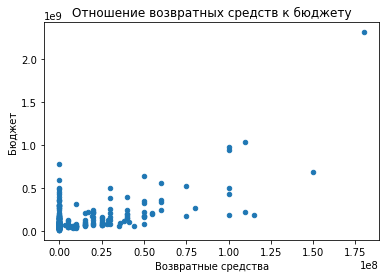

In [11]:
#print(data['box_office'].value_counts())
#data['budget'].unique()
#data.describe()
print(f'Коэффициент корреляции равен', data['budget'].corr(data['refundable_support']).round(2))
data.plot(x='refundable_support', 
          y='budget', 
          kind='scatter',
          title = 'Отношение возвратных средств к бюджету', 
          xlabel = 'Возвратные средства',
          ylabel = 'Бюджет');

Коэффициент корреляции равен 0.63


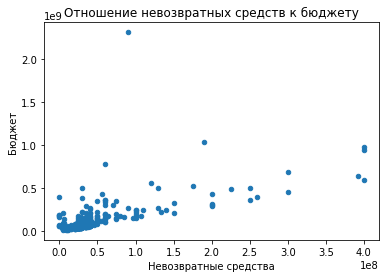

In [12]:
#data.describe()
print(f'Коэффициент корреляции равен', data['budget'].corr(data['nonrefundable_support']).round(2))
data.plot(x='nonrefundable_support', 
          y='budget', 
          kind='scatter',
          title = 'Отношение невозвратных средств к бюджету', 
          xlabel = 'Невозвратные средства',
          ylabel = 'Бюджет');

    Есть фильмы, получившие государственную поддержку, но имеют нулевой бюджет,
    я решил удалить т.к. их 17. Удалил, потому что помешают дальнейшему исследованию

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [13]:
data['publication_year'] = data['show_start_date'].dt.year
#display(data.head())

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [14]:
def name_genre(data, rows): 
    for row in rows: 
        data[f'head_{row}'] = data[row].str.split(', ', expand=True)[0]
    return data

data = name_genre(data, ['director', 'genres'])
#display(data.head(5))

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [15]:
data['gov_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
display(data['gov_support'].value_counts())
display(data.head(5))

0.6    6
0.7    5
0.7    5
0.7    5
0.5    5
      ..
0.6    1
0.7    1
0.8    1
0.7    1
0.2    1
Name: gov_support, Length: 281, dtype: int64

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,publication_year,head_director,head_genres,gov_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,мосфильм,СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма, военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


    Было добавлено 4 новых столбца

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Количество фильмов по годам: publication_year
2010    105
2011    109
2012    128
2013    184
2014    278
2015    459
2016    523
2017    355
2018    471
2019    529
Name: box_office, dtype: int64


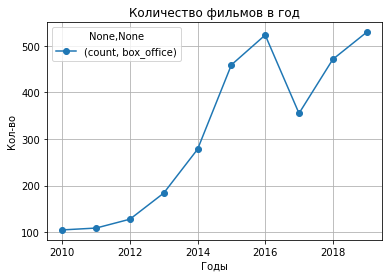

In [16]:
(
    data.pivot_table
    (index='publication_year', values='box_office', aggfunc=['count'])
    .plot(grid=True, style='o-', 
          title = 'Количество фильмов в год', 
          xlabel = 'Годы',
          ylabel = 'Кол-во')
)
print(f'Количество фильмов по годам: {data.groupby("publication_year")["box_office"].count()}')

    По графику и данным в столбце видно, что больше всего фильмов вышло в 2019 году - 529, меньше всего в 2010 - 105.

In [17]:
rate_films = (data['box_office'].count() / data['title'].count() * 100).round(2)
rate_films_by_year = (data.groupby('publication_year')['box_office'].count() / 
              data.groupby('publication_year')['title'].count() * 100).round(2)


print(f'Доля фильмов с указанной информацией о прокате: {rate_films}%')
print(f'Доля фильмов с указанной информацией о прокате по годам в %: {rate_films_by_year}')

Доля фильмов с указанной информацией о прокате: 42.06%
Доля фильмов с указанной информацией о прокате по годам в %: publication_year
2010   10.7
2011   17.5
2012   21.6
2013   29.2
2014   34.5
2015   65.7
2016   64.2
2017   70.6
2018   53.1
2019   56.9
dtype: float64


    Из полученной информации, можно сказать, что полнее всего представлен 2017 год, а менее всего 2010, 
    с годами видна тенденция роста информации

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

publication_year
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    7.4
2015   38.5
2016   46.7
2017   48.5
2018   49.3
2019   48.3
Name: box_office, dtype: float64


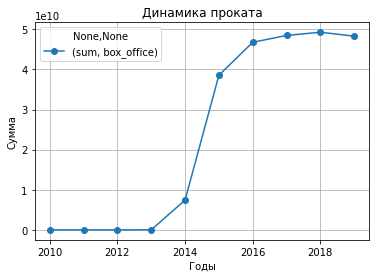

In [18]:
#data = data[data['box_office'] != 0]
print(data.groupby('publication_year')['box_office'].agg('sum') / 1000000000)
(
    data.pivot_table
    (index='publication_year', values='box_office', aggfunc=['sum'])
    .plot(grid=True, style='o-',
         title = 'Динамика проката', 
         xlabel = 'Годы',
         ylabel = 'Сумма')
);

    На графике видна тенденция роста, но она не стабильная, с резким скачком после 2014 года,
    скорее всего до этого момента данные или не полные или не соответствуют действительности.
    Максимальной сумма была в 2018 году - 49 млрд. руб., минимальной в 2010, но данные маловероятно 
    соответствуют действительности, поэтому лучше сказать что минимальная была в 2015 году - 38 млрд. руб.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
data.pivot_table
(index='publication_year', values='box_office', aggfunc=['median', 'mean'])

,median,mean
,box_office,box_office
publication_year,,
2010,"1,700.0","23,130.0"
2011,"3,000.0","129,383.2"
2012,"5,660.0","54,339.2"
2013,"3,522.5","161,954.9"
2014,"18,137.5","26,743,589.4"
2015,"4,784,781.5","83,938,621.3"
2016,"3,776,087.6","89,373,453.7"
2017,"9,919,415.0","136,501,823.2"


    Из таблицы видно, что средняя сильно отличается от медианы, в средней есть выбросы, которые сильно изменяют значения,
    хорошие года по сборам - 2017 и 2018.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

age_restriction
«0+» - для любой зрительской аудитории   0.1
«12+» - для детей старше 12 лет          5.9
«16+» - для детей старше 16 лет          7.5
«18+» - запрещено для детей              4.1
«6+» - для детей старше 6 лет            5.5
Name: box_office, dtype: float64


,publication_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,"379,054,578.4"
1,2015,«12+» - для детей старше 12 лет,"13,419,509,570.5"
2,2015,«16+» - для детей старше 16 лет,"10,781,600,601.3"
3,2015,«18+» - запрещено для детей,"5,430,350,628.9"
4,2015,«6+» - для детей старше 6 лет,"8,517,311,820.0"
5,2016,«0+» - для любой зрительской аудитории,"150,228,848.7"
6,2016,«12+» - для детей старше 12 лет,"11,150,762,104.0"
7,2016,«16+» - для детей старше 16 лет,"16,594,249,489.7"
8,2016,«18+» - запрещено для детей,"6,793,929,818.9"
9,2016,«6+» - для детей старше 6 лет,"12,053,146,008.2"


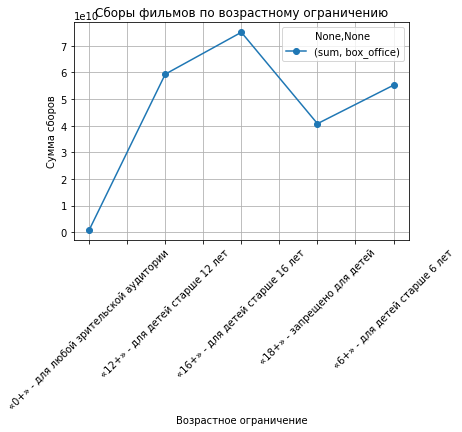

In [20]:
data = data[data['publication_year'] >= 2015]
print(data.groupby('age_restriction')['box_office'].agg('sum') / 10000000000)
(
    data.pivot_table
    (index='age_restriction', values='box_office', aggfunc=['sum'])
    .plot(grid=True, style='o-',
          title = 'Сборы фильмов по возрастному ограничению', 
          xlabel = 'Возрастное ограничение',
          ylabel = 'Сумма сборов')
)
plt.xticks(rotation=45)


data.groupby(['publication_year', 'age_restriction'])['box_office'].agg('sum').reset_index()


        Анализ рейтингов фильмов по их сборам выявил, что наибольшей популярностью пользуется категория 16+. 
        Фильмы с рейтингом 16+ почти всегда собирали больше всего средств.
        Объяснить эту тенденцию можно тем, что фильмы 16+ ориентированы на более широкую аудиторию. Также хорошие сборы 
        у фильмов с ограничениями 12+ и 6+, можно сказать, что эти фильмы тоже ориентированы на широкую аудиторию и 
        популярны среди семей и детей.
        Сборы у фильмов 18+ меньше, что не удивительно, эти фильмы для узкой аудитории.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
data['support'] = data['refundable_support'] + data['nonrefundable_support']
data['income'] = data['box_office'] - data['budget']
data.pivot_table(index='publication_year', values='support', aggfunc=['sum'])

/tmp/ipykernel_48/4145025638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['support'] = data['refundable_support'] + data['nonrefundable_support']
/tmp/ipykernel_48/4145025638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = data['box_office'] - data['budget']


,sum
,support
publication_year,
2015,"3,227,241,459.0"
2016,"3,977,155,482.0"
2017,"3,098,971,662.0"
2018,"3,098,000,000.0"
2019,"4,724,000,000.0"


    Из таблицы видно, что больше всего поддержки государство оказало в 2019 году

publication_year
2015   -2,451,922,802.2
2016   -2,252,512,301.3
2017    3,892,942,769.2
2018    2,865,962,647.1
2019   -2,793,053,263.9
Name: income, dtype: float64


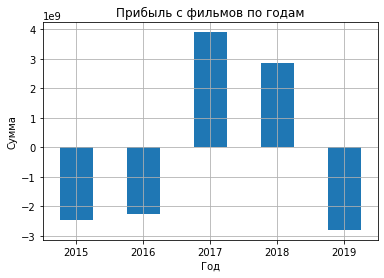

In [ ]:

data.query('nonrefundable_support > 0 or refundable_support > 0').groupby(
    'publication_year')['income'].sum().plot(kind='bar', 
                                             grid=True,
                                             title = 'Прибыль с фильмов по годам', 
                                             xlabel = 'Год',
                                             ylabel = 'Сумма')

plt.xticks(rotation=360)
print(data.query('nonrefundable_support > 0 or refundable_support > 0').groupby('publication_year')['income'].sum())

    Исходя из графика нельзя точно что-то сказать, какие-то года прибыльные, какие-то нет, самый прибыльный год - 2017,
    а самый убыточный - 2019

<div class="alert alert-success">

**Артём:** 👍 Хорошо.

</div>

In [23]:
data.groupby('publication_year')['support'].count()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 7484
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  3833 non-null   object             
 1   pu_number              3833 non-null   int64              
 2   show_start_date        3833 non-null   datetime64[ns, UTC]
 3   type                   3833 non-null   object             
 4   film_studio            3833 non-null   object             
 5   production_country     3833 non-null   object             
 6   director               3833 non-null   object             
 7   producer               3833 non-null   object             
 8   age_restriction        3833 non-null   object             
 9   refundable_support     298 non-null    float64            
 10  nonrefundable_support  298 non-null    float64            
 11  budget                 298 non-null    float64          

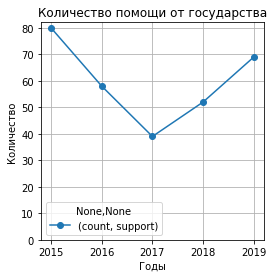

In [24]:
(
    data.pivot_table(
        index='publication_year', values='support', aggfunc=['count'])
        .plot(ylim=0, grid=True, style='o-',
        title = 'Количество помощи от государства', 
        xlabel = 'Годы',
        ylabel = 'Количество',
        figsize=(4, 4))
);

<div class="alert alert-success">

#### **Артём:** 👍 Чтобы не выводить `<...>` можно поставить в конце строки `;`.
    
</div>

<div class="alert alert-success">

**Артём:**  Год в формате `.0` Смотрится странно, скорректируй здесь и далее.
    
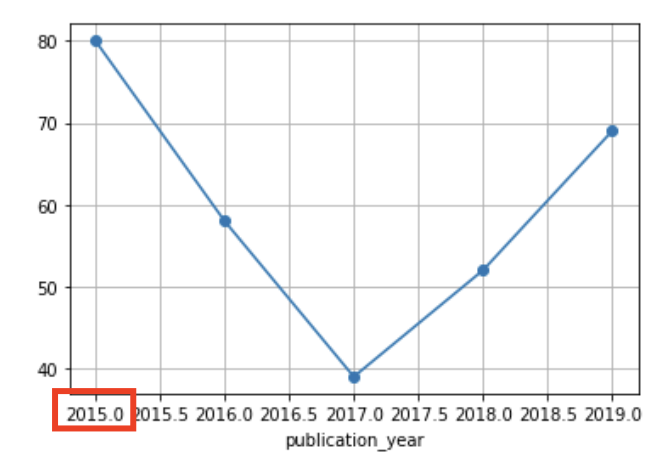    
    
</div>

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Женя:** ✔️ Исправил 

<div class="alert alert-success">

**Артём:** 👍 Молодец.

                  min  max  median
publication_year                  
2015              2.4  8.7     6.4
2016              1.0  8.7     6.5
2017              2.9  8.5     6.4
2018              1.7  9.0     6.4
2019              1.6  9.1     6.5


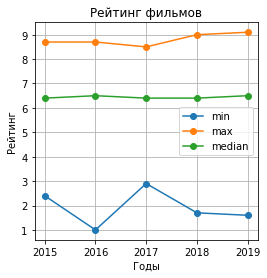

In [25]:
print(data.groupby('publication_year')['ratings'].agg(
    ['min', 'max', 'median']))
data.groupby('publication_year')['ratings'].agg(
    ['min', 'max', 'median']).plot(
    grid=True, 
    style='o-',
    title = 'Рейтинг фильмов', 
    xlabel = 'Годы',
    ylabel = 'Рейтинг',
    figsize=(4, 4));

    Средний рейтинг у фильмов - 6.4 - 6.5, самые хорошие оценки получили фильмы, выпущенные в 2019 году, 
    а самые плохие в 2016 году

<div class="alert alert-success">

**Артём:** 👍 Интересно.

</div>

In [26]:
(
    data.groupby('head_genres')['support'].agg(['count', 'sum'])
    .sort_values(by='sum', ascending=False).head(10)
)

,count,sum
head_genres,,
драма,84,"4,943,904,333.0"
комедия,65,"2,817,435,000.0"
мультфильм,25,"1,861,520,000.0"
фантастика,9,"1,131,000,000.0"
фэнтези,11,"1,032,900,000.0"
история,4,"1,020,000,000.0"
триллер,14,"709,645,285.0"
приключения,7,"696,000,000.0"
детектив,5,"485,000,000.0"


    Больше всего поддержки получили фильмы с жанром "драма" и по количеству и по деньгам. Видимо в России любят плакоть

<div class="alert alert-success">

**Артём:** 😁

</div>

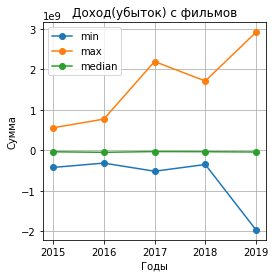

In [27]:
data.groupby('publication_year')['income'].agg(
    ['min', 'max', 'median']).plot(
    grid=True, 
    style='o-', 
    title = 'Доход(убыток) с фильмов', 
    xlabel = 'Годы',
    ylabel = 'Сумма',
    figsize=(4, 4));

    Больше всего поддержи было оказано в 2019 году, также видна тенденция роста поддержки с годами

<div class="alert alert-success">

**Артём:** 👍 Молодец.

</div>

### Шаг 5. Напишите общий вывод

   **Во время исследования рынка Российского кинопроката, данные были обработаны: заполнены пропуски и удалены дубликаты, были добавлены новые столбцы. По итогам можно сделать следующие выводы:**

*-Исследовательский анализ:*

    Больше всего фильмов вышло в 2019 году - 529, меньше всего в 2010 - 105.
    Лучше всего представлен 2017 год, а менее всего 2010. 
    Максимальной сумма сборов была в 2018 году - 49 млрд. руб., минимальной в 2015 году - 38 млрд. руб.
    Анализ рейтингов фильмов по сборам выявил, что наибольшей популярностью пользуется категория 16+,
    также хорошие сборы у фильмов с категориями 12+ и 6+.
    
*-Исследование фильмов, которые получили государственную поддержку:*

    Больше всего поддержки государство оказало в 2019 году.
    Больше всего поддержки получили фильмы с жанром "драма".
    Окупаемость у фильмов плохая, есть года, где фильмы себя неплохо окупили, но это скорее исключение, чем правило.
    Средний рейтинг у фильмов - 6.4 - 6.5
    Из анализа видно, что есть тенденция роста поддержки отечественного кинопроката.
    
    


<div class="alert alert-success">

**Артём:** 👍 Коротко, но в целом хорошо. Принято.

</div>

## 🏁 Итоги ревью
<a id="results"></a>
[В начало](#start)
<div class="alert alert-danger">

**Артём:** ❌ Женя, спасибо за работу. Осталось исправить несколько комментариев и можно идти к заказчику. Молодец! 👍
    
Для удобства, комментарии которые нужно скорректировать я добавил в меню **Contents** слева.
    
Жду новую версию проекта. 🙂

</div>

<img src="https://s19536.pcdn.co/wp-content/uploads/2020/06/Web-Great-Job.jpg"> 
<div class="alert alert-success">   

**Артём:** ✌️ Женя, спасибо за работу и внесенные корректировки! Критических замечаний нет, вернее есть одно, но из-за него не буду тебя задерживать, исправь.
    

Поздравляю, **проект принят!** 🥳 🎉 Ты молодец!

Желаю тебе успехов в дальнейшем обучении. 😉
    
---
    
#### 📖 **Полезные ссылки**

* [Работа в Яндексе](https://yandex.ru/jobs/pages/analytics_interview?ysclid=l84s63fs1g790141490)
* [Настройте свой Jupyter Notebook правильно](https://medium.com/nuances-of-programming/настройте-свой-jupyter-notebook-правильно-faef14c89434)    
* [Краткое руководство по Маркдауну](https://paulradzkov.com/2014/markdown_cheatsheet/?)
* [PEP 8 – Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/)    
* [Обработка пропусков в данных](https://loginom.ru/blog/missing)  
* [Разделение данных с помощью qcut и cut в Pandas](https://dfedorov.spb.ru/pandas/Разделение%20данных%20в%20Pandas%20с%20помощью%20qcut%20и%20cut.html?)  
* [Официальная документаци метода qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
* [Подробное руководство по группировке и агрегированию с помощью pandas](https://dfedorov.spb.ru/pandas/Подробное%20руководство%20по%20группировке%20и%20агрегированию%20с%20помощью%20pandas.html?ysclid=lcmm6rtg2w602526506)
* [Проверка статистических гипотез. (21 мая 2020 г.)](https://allatambov.github.io/psms/pdf/hypo-test.pdf)    
* [Шпаргалка по визуализации данных в Python с помощью Plotly](https://habr.com/ru/articles/502958/) 
* [Тест гигиены визуализации данных](https://bar-or-pie.dianov.org)    
* [Задачки SQL](https://habr.com/ru/company/dcmiran/blog/500360/)    
* [7 cайтов для оттачивания навыка написания SQL запросов на 2020 год](https://techrocks.ru/2019/11/22/7-sites-to-perfect-sql-query-writing-skills/)
* [Главред помогает очистить текст от словесного мусора, проверяет на соответствие информационному стилю.](https://glvrd.ru)

</div>    